# Linear Discriminant Analysis: Group Review
# Quality: 345678, Outliers: Original

## Set Working Directory

## Import Packages

In [134]:
library("tidyr")
library("corrplot")
library("MASS")
library("ggplot2")
library("tibble")
library("reshape2")

## Load in Data

In [135]:
wine <- read.csv("WineQT.csv")
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


### View Structure of the Dataset

In [136]:
str(wine)

'data.frame':	1143 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.097 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 15 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 9.2 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ Id                  : int  0 1 2 3 4 5 6 7 8 10 ...


## Data Wrangling

### Remove Unnecessary Columns

In [137]:
wine_wrangled <- wine[, c(2,5,8,9,12)]
head(wine_wrangled)

,volatile.acidity,chlorides,density,pH,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.70,0.076,0.9978,3.51,5
2,0.88,0.098,0.9968,3.20,5
3,0.76,0.092,0.9970,3.26,5
4,0.28,0.075,0.9980,3.16,6
5,0.70,0.076,0.9978,3.51,5
6,0.66,0.075,0.9978,3.51,5


### Summarizing the Dataset

In [138]:
summary(wine_wrangled)

 volatile.acidity   chlorides          density             pH       
 Min.   :0.1200   Min.   :0.01200   Min.   :0.9901   Min.   :2.740  
 1st Qu.:0.3925   1st Qu.:0.07000   1st Qu.:0.9956   1st Qu.:3.205  
 Median :0.5200   Median :0.07900   Median :0.9967   Median :3.310  
 Mean   :0.5313   Mean   :0.08693   Mean   :0.9967   Mean   :3.311  
 3rd Qu.:0.6400   3rd Qu.:0.09000   3rd Qu.:0.9978   3rd Qu.:3.400  
 Max.   :1.5800   Max.   :0.61100   Max.   :1.0037   Max.   :4.010  
    quality     
 Min.   :3.000  
 1st Qu.:5.000  
 Median :6.000  
 Mean   :5.657  
 3rd Qu.:6.000  
 Max.   :8.000  

## Scale the Data: Scale Each Predictor Value

In [139]:
wine_wrangled[1:4] <- scale(wine_wrangled[1:4])

### Find the Mean of Each Predictor Value:  Mean Should == 0
### Find the Standard Deviation of Each Predictor Value:  Standard Deviation Should == 1

In [140]:
apply(wine_wrangled[1:4], 2, mean)
apply(wine_wrangled[1:4], 2, sd)

volatile.acidity        chlorides          density               pH 
   -1.652847e-16    -3.662422e-17     1.039748e-16    -8.347812e-16

volatile.acidity        chlorides          density               pH 
               1                1                1                1

## Create Training and Test Samples

### Making this Example Reproducible

In [141]:
set.seed(1)

### Using 70% of Dataset as Training Set, Remaining 30% as Testing Set

In [142]:
sample <- sample(c(TRUE, FALSE), nrow(wine_wrangled), replace=TRUE, prob=c(0.7,0.3))
train <- wine_wrangled[sample, ]
test <- wine_wrangled[!sample, ]

## Fit LDA Model

In [144]:
model <- lda(quality~., data=train)

### View Model Output

In [145]:
model

Call:
lda(quality ~ ., data = train)

Prior probabilities of groups:
      3       4       5       6       7       8 
0.00375 0.03500 0.41000 0.40375 0.13875 0.00875 

Group means:
  volatile.acidity   chlorides     density          pH
3        1.6162274  0.57969628  0.75127534 -0.13413972
4        0.9389212 -0.17689181 -0.07423699  0.60219472
5        0.3060258  0.06676452  0.17778146 -0.05006982
6       -0.1265455 -0.02660845 -0.06272600  0.08146231
7       -0.7517112 -0.20746900 -0.24422054 -0.17324330
8       -0.2619386 -0.41867761 -0.73859231 -0.56271828

Coefficients of linear discriminants:
                         LD1         LD2        LD3         LD4
volatile.acidity -0.98724052  0.18916601 -0.4664482 -0.07840115
chlorides        -0.16585074 -0.05781727  0.6957015 -0.99078930
density          -0.33540027 -0.01726327  0.7285571  0.74287367
pH               -0.09262148 -1.06106451  0.4185101  0.07261674

Proportion of trace:
   LD1    LD2    LD3    LD4 
0.8629 0.0804 0.0517 0.0

Prior probabilities of group: The proportions of each 'quality' rating in the training set.

Group means: The mean values for each predictor variable for each 'quality' rating.

Coefficients of linear discriminants: Linear combination of predictor variables used to form the decision rule of the LDA model.

### View Model Info

In [146]:
model$counts
model$prior
model$scaling
model$svd

3   4   5   6   7   8 
  3  28 328 323 111   7

3       4       5       6       7       8 
0.00375 0.03500 0.41000 0.40375 0.13875 0.00875

,LD1,LD2,LD3,LD4
volatile.acidity,-0.98724052,0.18916601,-0.4664482,-0.07840115
chlorides,-0.16585074,-0.05781727,0.6957015,-0.99078930
density,-0.33540027,-0.01726327,0.7285571,0.74287367
pH,-0.09262148,-1.06106451,0.4185101,0.07261674


[1] 5.8990682 1.8007533 1.4442519 0.4484159

### Store Model Means

In [147]:
modelmeans <- model$means

### Convert Matrix to a Data Frame

In [148]:
modelmeans <- as.data.frame(modelmeans)
str(modelmeans)

'data.frame':	6 obs. of  4 variables:
 $ volatile.acidity: num  1.616 0.939 0.306 -0.127 -0.752 ...
 $ chlorides       : num  0.5797 -0.1769 0.0668 -0.0266 -0.2075 ...
 $ density         : num  0.7513 -0.0742 0.1778 -0.0627 -0.2442 ...
 $ pH              : num  -0.1341 0.6022 -0.0501 0.0815 -0.1732 ...


### Convert Row Labels to Columns

In [149]:
modelmeans <- tibble::rownames_to_column(modelmeans, "quality")

## Plot Means

### Melt Data Frame

In [150]:
mmodelmeans <- melt(modelmeans, id.vars="quality")

### All Variables on the Same Plot

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warnin

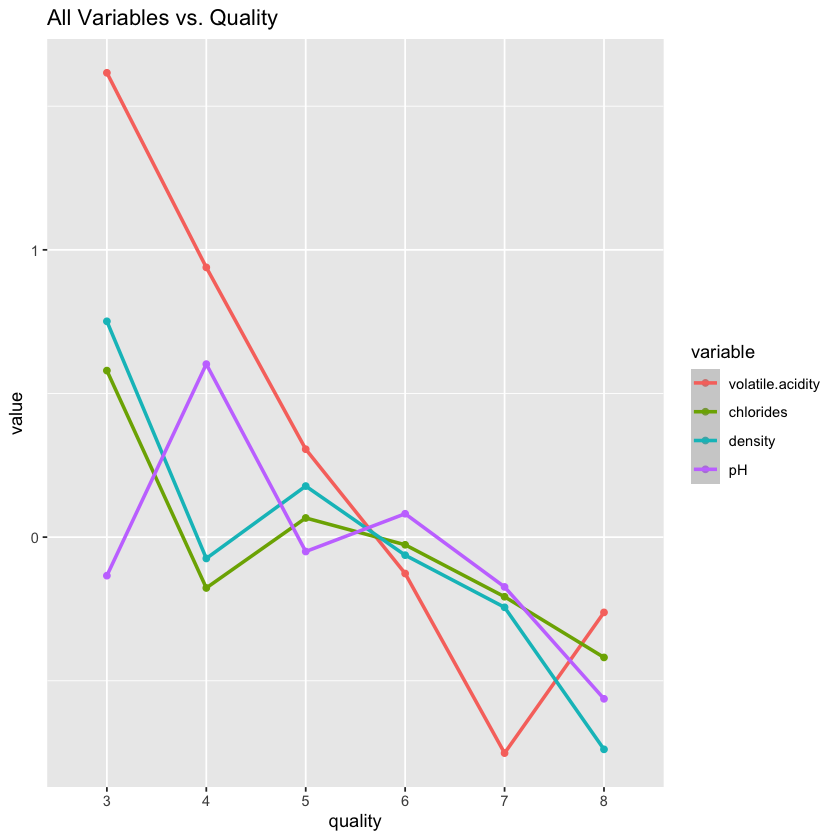

In [189]:
ggplot(mmodelmeans, aes(quality, value, group=variable, col=variable)) + ggtitle("All Variables vs. Quality")+ geom_line() + geom_point() + stat_smooth()

### Variables on Separate Plots

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warnin

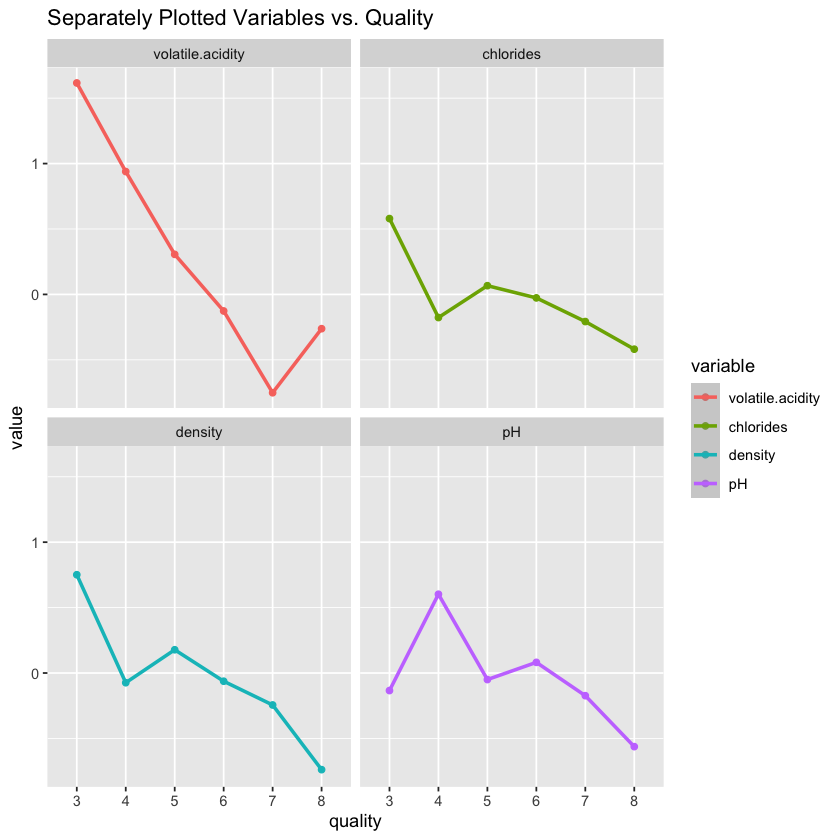

In [190]:
ggplot(mmodelmeans, aes(quality, value, group=variable, col=variable)) + ggtitle ("Separately Plotted Variables vs. Quality")+
  geom_point() + 
  stat_smooth() +
  facet_wrap(~variable)

## Assumptions Testing

### Misclassification Rate

In [152]:
lda.pred = (test$class)

In [153]:
lda.error = mean(default$default != lda.pred)

ERROR: Error in mean(default$default != lda.pred): object 'default' not found


In [44]:
lda.error

ERROR: Error in eval(expr, envir, enclos): object 'lda.error' not found


### Confusion Matrix

In [154]:
LDA_model = lda.cm

ERROR: Error in eval(expr, envir, enclos): object 'lda.cm' not found


In [155]:
LDA_model

ERROR: Error in eval(expr, envir, enclos): object 'LDA_model' not found


## LDA model: Make Predictions on Test Data

In [156]:
predicted <- predict(model, test)
names(predicted)

[1] "class"     "posterior" "x"

### View Predicted Class (First Six Observations)

In [157]:
head(predicted$class)

[1] 6 5 5 6 5 6
Levels: 3 4 5 6 7 8

### View Predicted Posterior Probability (First Six Observations)¶

In [158]:
head(predicted$posterior)

,3,4,5,6,7,8
4,5.447785e-05,0.003475051,0.2565498,0.4301147,0.30296603,0.0068399848
6,1.987033e-03,0.073402627,0.4912910,0.3942343,0.03847096,0.0006141343
7,8.915412e-04,0.031148641,0.4676033,0.4060456,0.08754223,0.0067686941
15,1.416444e-04,0.017983603,0.3067431,0.5451008,0.12954337,0.0004875773
17,4.426605e-04,0.011806595,0.4147467,0.4146365,0.14686400,0.0115036090
18,1.175394e-04,0.013746531,0.2949952,0.5243992,0.16488502,0.0018565266


### View Linear Discriminants (First Six Observations)¶

In [108]:
head(predicted$x)

,LD1,LD2,LD3,LD4
2,-1.9778909,0.8537230,-1.1994157,-0.6494332
6,-1.0784419,-0.9136991,0.6410399,0.9038224
8,-0.2825177,-0.6473146,-1.0742852,-0.5272994
10,-0.1433853,0.1363726,-0.4166806,-0.6304414
11,-0.2406689,-1.7901037,0.0799071,-0.6803499
12,-0.6399323,0.4674990,0.1952364,-0.3206199


## Accuracy of the Model

In [177]:
mean(predicted$class==test$quality)

[1] 0.5597668

## Visualize the Results

### Convert Quality to a Factor

In [178]:
wine_wrangled$quality = factor(wine_wrangled$quality, levels = c("3", "4", "5", "6", "7", "8"), ordered = TRUE)
str(wine_wrangled)

'data.frame':	1143 obs. of  5 variables:
 $ volatile.acidity: num  0.939 1.941 1.273 -1.399 0.939 ...
 $ chlorides       : num  -0.231 0.234 0.107 -0.252 -0.231 ...
 $ density         : num  0.5556 0.0361 0.14 0.6595 0.5556 ...
 $ pH              : num  1.27 -0.709 -0.326 -0.964 1.27 ...
 $ quality         : Ord.factor w/ 6 levels "3"<"4"<"5"<"6"<..: 3 3 3 4 3 3 3 5 5 3 ...


### Rebuild Model with 'Quality' as a Factor

In [181]:
set.seed(1)

In [182]:
sample <- sample(c(TRUE, FALSE), nrow(wine_wrangled), replace=TRUE, prob=c(0.7,0.3))
train <- wine_wrangled[sample, ]
test <- wine_wrangled[!sample, ]

In [183]:
LDAmodel <- lda(quality~., data=train)

### Define Data to Plot

In [184]:
lda_plot <- cbind(train, predict(LDAmodel)$x)

### Create Plot

Warning message:
“Duplicated aesthetics after name standardisation: ”


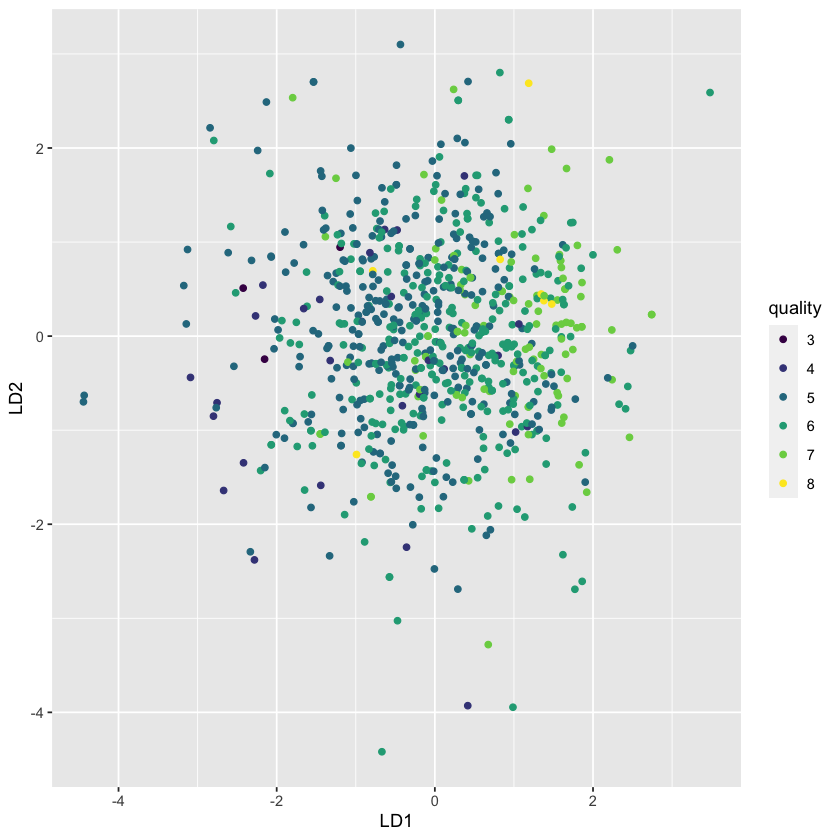

In [185]:
ggplot(lda_plot, aes(LD1, LD2, LD3, LD4)) +
  geom_point(aes(color = quality))

## Identify Outliers

### Density

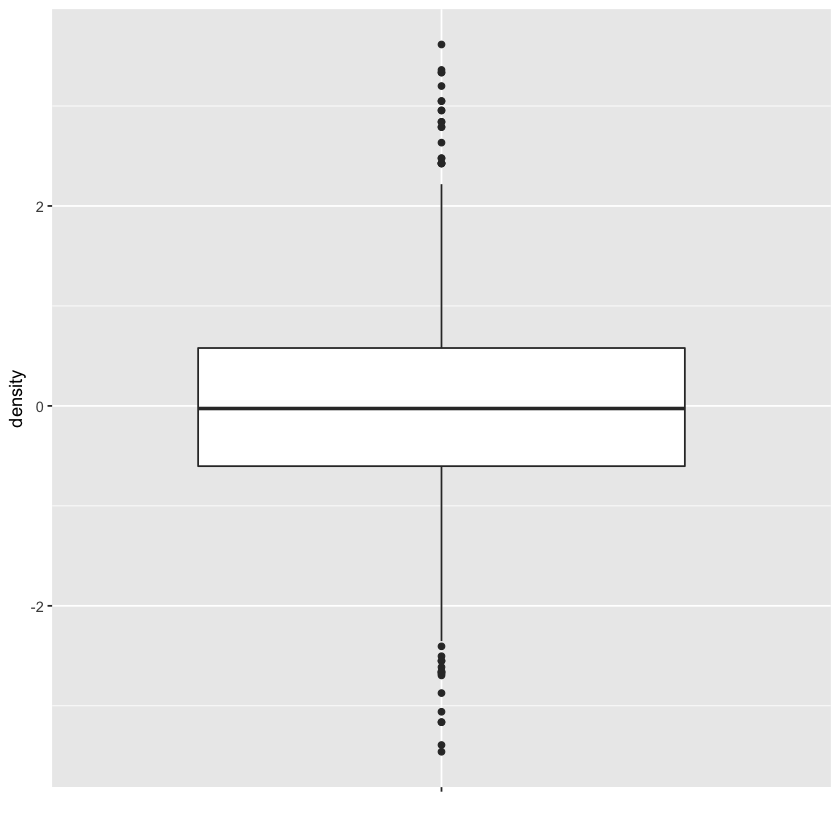

In [160]:
bp.density <- ggplot(wine_wrangled, aes(x = "", y = density)) + geom_boxplot() + xlab("")
bp.density

In [55]:
boxplot.stats(wine_wrangled$density)

$stats
[1] -2.35337829 -0.60278999 -0.02618672  0.57898698  2.21789086

$n
[1] 1143

$conf
[1] -0.08141602  0.02904257

$out
 [1] -2.665056 -2.665056  2.425676  2.477622  2.477622  2.633461 -2.872841
 [8]  2.841246  2.841246  2.425676  2.425676  3.360708  3.049031  2.425676
[15]  3.334735  3.334735  2.789300  2.789300 -2.613109  3.049031 -2.405325
[22] -2.696223 -3.163740 -3.163740  3.199675 -2.654666 -3.459833 -3.392303
[29] -2.680640 -3.059847 -2.504022  3.615245  2.955527 -2.550774  2.955527
[36] -2.550774

#### Density Outlier Count: 36

### Chlorides 

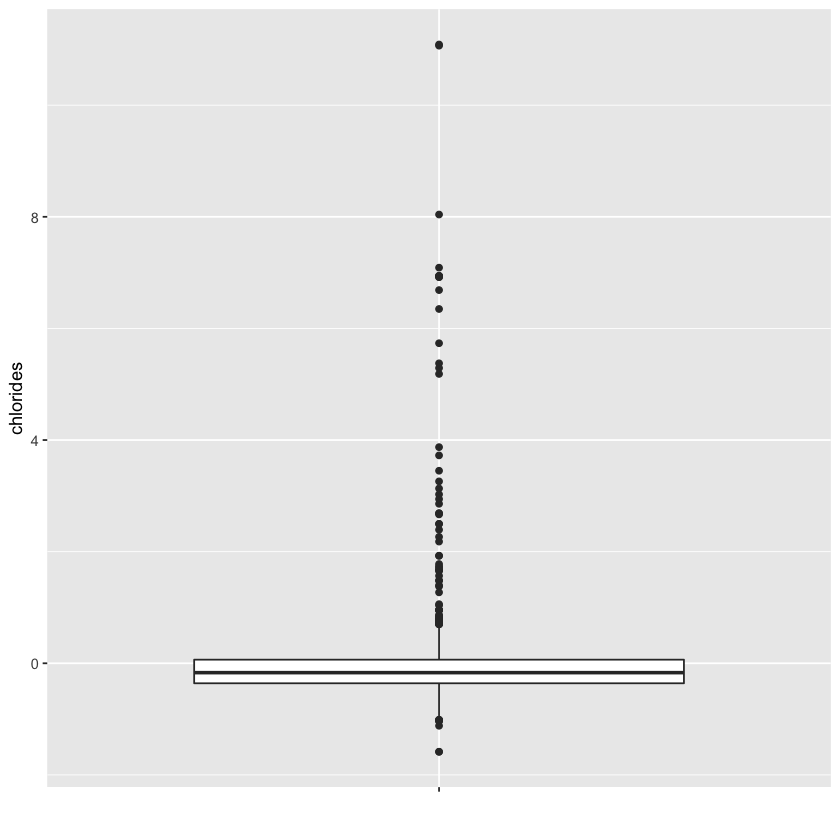

In [161]:
bp.chlorides <- ggplot(wine_wrangled, aes(x = "", y = chlorides)) + geom_boxplot() + xlab("")
bp.chlorides

In [162]:
boxplot.stats(wine_wrangled$chlorides)

$stats
[1] -0.9717626 -0.3582312 -0.1678248  0.0648940  0.6784255

$n
[1] 1143

$conf
[1] -0.1875992 -0.1480505

$out
 [1]  5.3751148  5.1847085  8.0408033  1.9266447 11.0661482  3.8730205
 [7] -1.0140752  5.2904897  3.7249266 11.0873045  5.7347712  2.6671137
[13]  2.6882700  0.7207380  0.8688318  0.6995817  0.7418943  0.7418943
[19]  0.7207380  0.8476755  1.3765820  0.8053630  0.7418943  2.3920824
[25]  2.9421451  3.4498953  0.7842068  2.8575201 -1.0140752  1.4823633
[31]  7.0887717 -1.1198565  6.3483026  6.9406779  1.4823633  3.2594890
[37]  2.1805198  0.9534568  0.8265193 -1.0352314  1.6516134  1.2708007
[43] -1.5852941 -1.5852941  2.2651448  0.9534568  1.5669883  0.6995817
[49]  0.6995817  0.7630505  0.7630505  6.9195216  1.7785509  1.9266447
[55]  1.6727696  1.0380819  0.9534568  0.9534568  0.7630505  0.7630505
[61]  6.6868028  1.0592381  6.9195216  1.6727696  1.7150821  6.9406779
[67]  1.3977383  6.9406779  0.7630505  2.6882700  1.7362384  2.4978637
[73]  2.4978637 -1.0140752  3.1325514  3.0267701 -1.0352314

#### Chlorides Outlier Count: 77

### Volatile Acidity

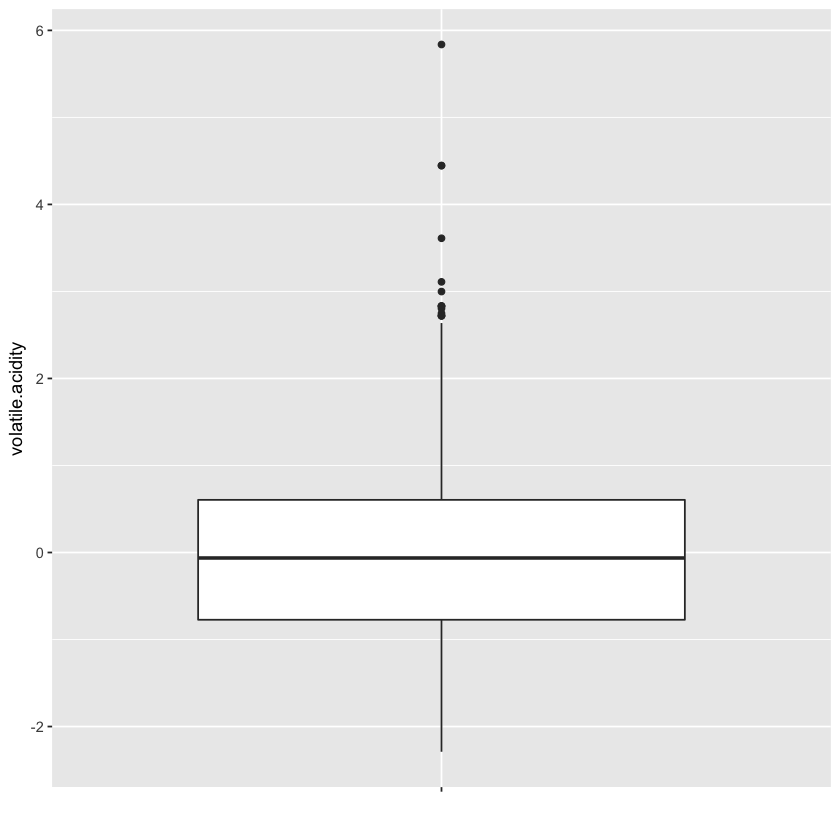

In [163]:
bp.volatile.acidity <- ggplot(wine_wrangled, aes(x = "", y = volatile.acidity)) + geom_boxplot() + xlab("")
bp.volatile.acidity

In [115]:
boxplot.stats(wine_wrangled$volatile.acidity)

$stats
[1] -2.28988070 -0.77290049 -0.06312075  0.60490723  2.63682569

$n
[1] 1143

$conf
[1] -0.127511371  0.001269862

$out
 [1] 2.720329 2.998674 4.446068 4.446068 2.831667 3.110012 2.831667 2.720329
 [9] 2.803833 2.748164 2.720329 5.837793 3.611033 2.831667

#### Volatile Acidity Outliers Count: 14

### pH

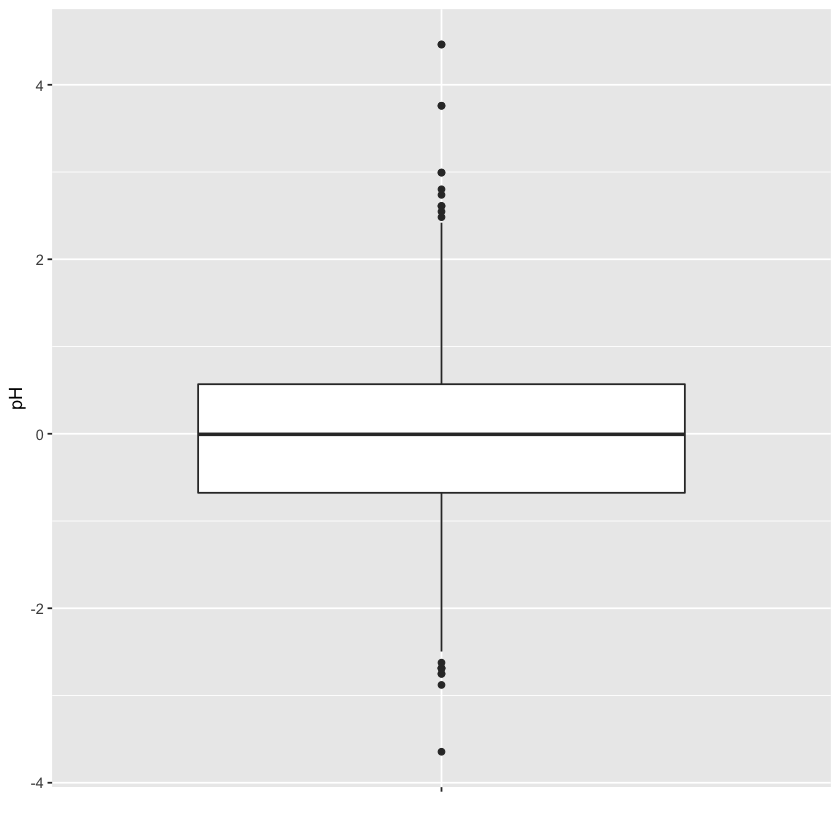

In [164]:
bp.ph <- ggplot(wine_wrangled, aes(x = "", y = pH)) + geom_boxplot() + xlab("")
bp.ph

In [116]:
boxplot.stats(wine_wrangled$pH)

$stats
[1] -2.495881147 -0.676701940 -0.006478021  0.567999623  2.419094254

$n
[1] 1143

$conf
[1] -0.06464804  0.05169200

$out
 [1]  3.759542  2.802079 -3.644836 -2.751205 -2.878866  2.738249  2.610587
 [8] -2.687374 -2.687374  3.759542  2.546756 -2.687374  2.993572  2.482925
[15]  2.993572  4.461681 -2.623543  4.461681 -2.751205  2.610587

#### pH Outliers Count: 20

## Graphing the Relationship of the Variables with Quality

In [165]:
aggregate(x = wine_wrangled$volatile.acidity, by = list(wine_wrangled$quality), FUN = mean) 

Group.1,x
<int>,<dbl>
3,2.0383839
4,0.9389212
5,0.3002837
6,-0.1468652
7,-0.7663798
8,-0.6754797


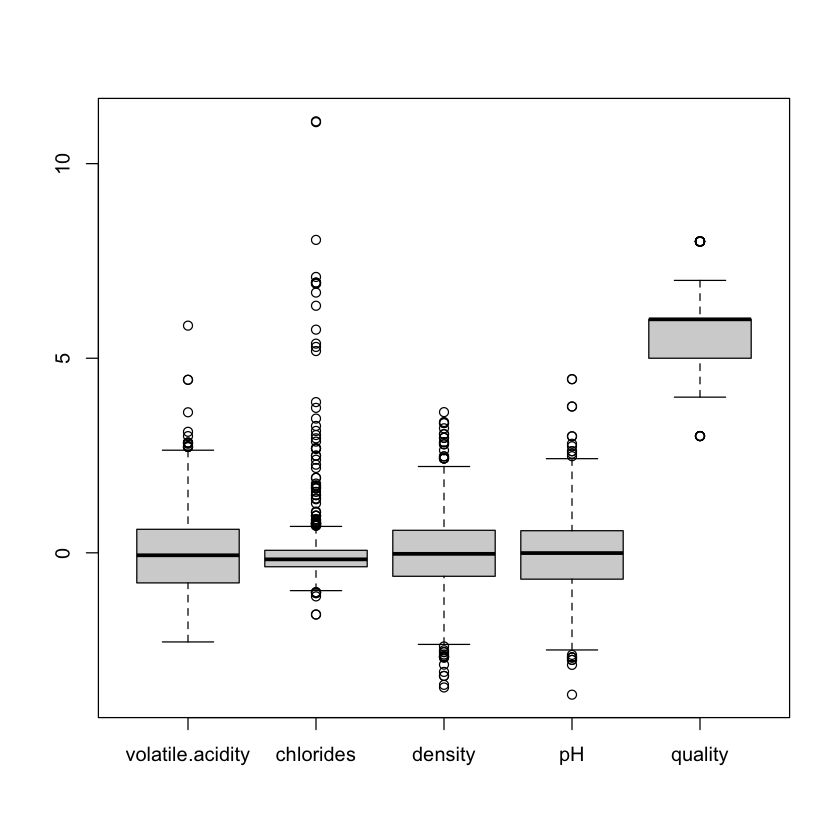

In [166]:
boxplot(wine_wrangled)

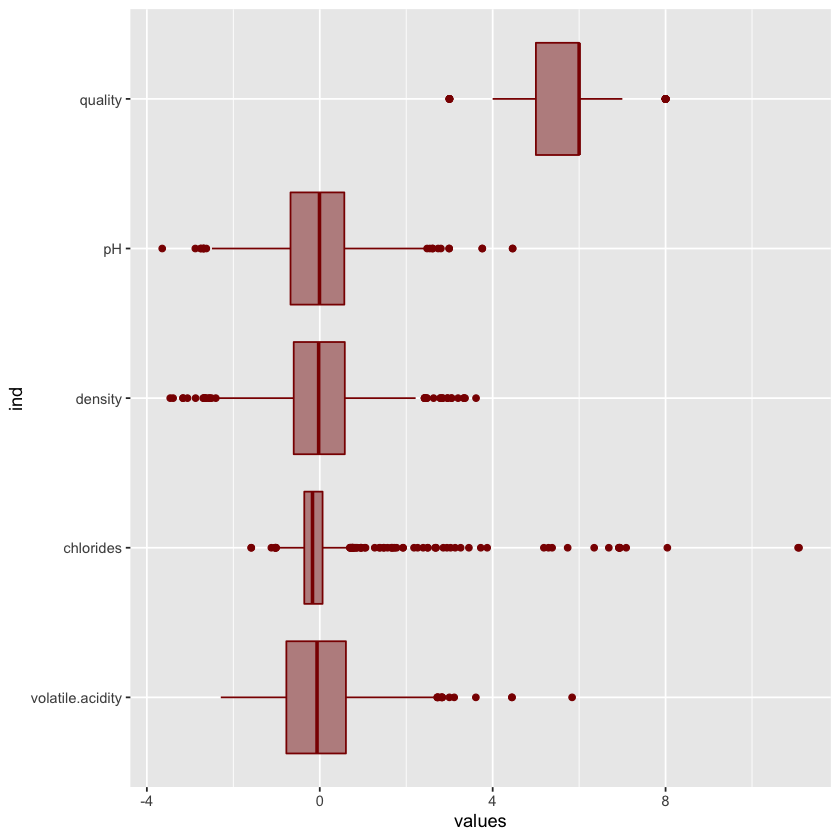

In [167]:
ggplot(stack(wine_wrangled), aes(x = ind, y = values))+
  geom_boxplot(fill='rosybrown', color="darkred") +
  coord_flip()

## Remove Outliers

### Chlorides

In [168]:
chloride.Q1 <- quantile(wine_wrangled$chlorides, .25)
chloride.Q3 <- quantile(wine_wrangled$chlorides, .75)
chloride.IQR <- IQR(wine_wrangled$chlorides)

In [169]:
no.chlorides.outliers <- subset(wine_wrangled, wine_wrangled$chlorides > (chloride.Q1 - 1.5*chloride.IQR) 
                                & wine_wrangled$chlorides < (chloride.Q3 + 1.5*chloride.IQR))

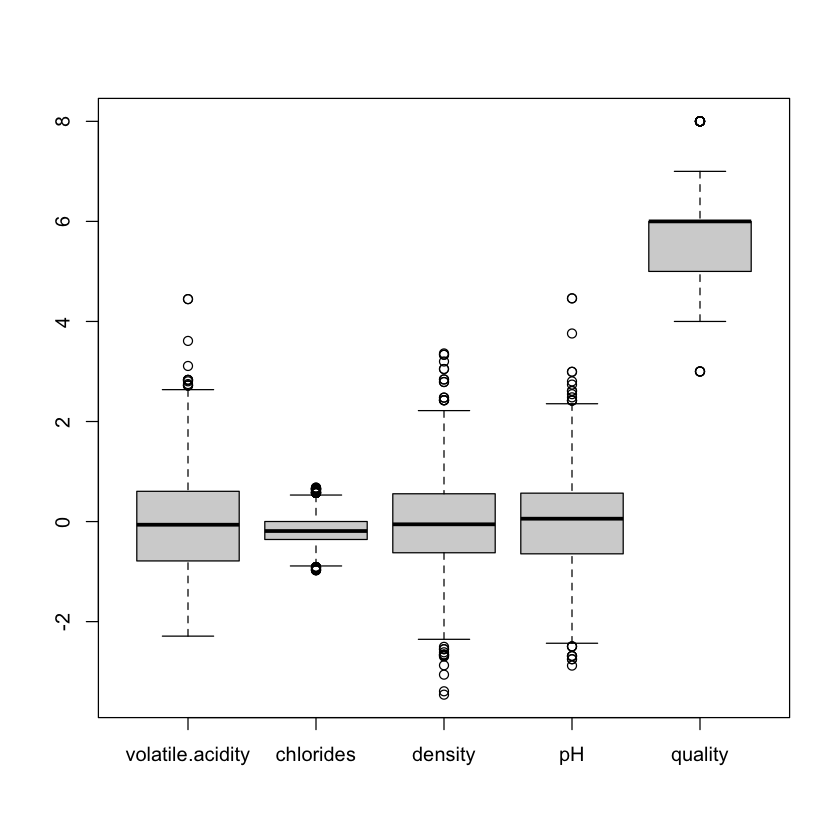

In [170]:
boxplot(no.chlorides.outliers)

### Recheck Outlier Count

#### pH

In [171]:
boxplot.stats(no.chlorides.outliers$pH)

$stats
[1] -2.43205030 -0.64478652  0.05735283  0.56799962  2.35526340

$n
[1] 1066

$conf
[1] -0.001336983  0.116042639

$out
 [1]  3.759542  2.802079  2.419094  2.419094 -2.751205 -2.878866  2.738249
 [8] -2.495881 -2.495881  2.610587 -2.687374 -2.687374 -2.495881  2.546756
[15]  2.419094 -2.687374  2.993572  2.482925  2.993572  4.461681  4.461681
[22] -2.751205  2.610587

#### Volatile Acidity

In [123]:
boxplot.stats(no.chlorides.outliers$volatile.acidity)

$stats
[1] -2.28988070 -0.78681774 -0.06312075  0.60490723  2.63682569

$n
[1] 1066

$conf
[1] -0.130469871  0.004228362

$out
 [1] 2.720329 4.446068 4.446068 2.831667 3.110012 2.831667 2.720329 2.803833
 [9] 2.748164 2.720329 3.611033 2.831667

#### Density

In [172]:
density_Q1 <- quantile(no.chlorides.outliers$density, .25)
density_Q3 <- quantile(no.chlorides.outliers$density, .75)
density_IQR <- IQR(no.chlorides.outliers$density)

In [173]:
no_outliers_cd <- subset(no.chlorides.outliers, no.chlorides.outliers$density > (density_Q1 - 1.5*density_IQR) & 
                         no.chlorides.outliers$density < (density_Q3 + 1.5*density_IQR))

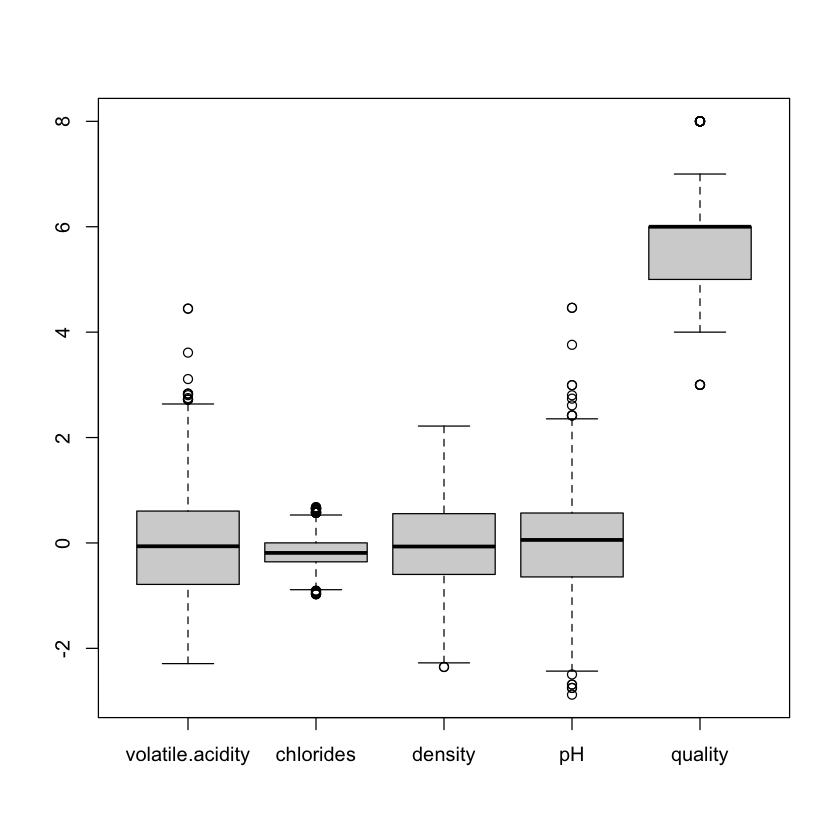

In [174]:
boxplot(no_outliers_cd)

### Recount Outliers

In [175]:
boxplot.stats(no_outliers_cd$volatile.acidity)

$stats
[1] -2.28988070 -0.78681774 -0.06312075  0.60490723  2.63682569

$n
[1] 1037

$conf
[1] -0.131405096  0.005163587

$out
 [1] 2.720329 4.446068 4.446068 2.831667 3.110012 2.831667 2.720329 2.803833
 [9] 2.748164 2.720329 3.611033 2.831667

In [176]:
boxplot.stats(no_outliers_cd$pH)

$stats
[1] -2.43205030 -0.64478652  0.05735283  0.56799962  2.35526340

$n
[1] 1037

$conf
[1] -0.002151963  0.116857619

$out
 [1]  3.759542  2.802079  2.419094  2.419094 -2.751205 -2.878866  2.738249
 [8] -2.687374 -2.687374 -2.495881  2.419094  2.993572  2.993572  4.461681
[15]  4.461681 -2.751205  2.610587